# Convolutional Neural Network

## Import Necessary Libraries

In [1]:
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from matplotlib import pyplot as plt
import numpy as np

2024-10-18 17:26:43.879374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 17:26:44.013744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-18 17:26:44.013776: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-10-18 17:26:44.045728: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 17:26:44.828160: W tensorflow/stream_executor/pla

### Load dataset

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

### Reshape

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
y_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
len(y_classes)

10

### Observe Dataset

In [8]:
def show_image(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

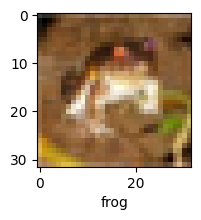

In [9]:
show_image(X_train, y_train, 0)

### Normalize Dataset

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### Build Model

In [13]:
# Initialize the model
model = Sequential()

# Add the layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))  # Corrected: added missing parenthesis and added the 3rd dimension for color channels
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=34, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

2024-10-18 17:26:49.192862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-10-18 17:26:49.192895: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-18 17:26:49.192915: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-c291c622-1aca-459c-9283-997fd4a58680): /proc/driver/nvidia/version does not exist
2024-10-18 17:26:49.193639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile Model

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
2024-10-18 17:26:49.827932: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
1563/1563 [==============================] - 127s 81ms/step - loss: 1.5008 - accuracy: 0.4560 - val_loss: 1.2696 - val_accuracy: 0.5479
Epoch 2/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.1317 - accuracy: 0.6014 - val_loss: 1.1079 - val_accuracy: 0.6201
Epoch 3/5
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9939 - accuracy: 0.6514 - val_loss: 0.9600 - val_accuracy: 0.6693
Epoch 4/5
1563/1563 [==============================] - 124s 79ms/step - loss: 0.9175 - accuracy: 0.6830 - val_loss: 0.9944 - val_accuracy: 0.6579
Epoch 5/5
1563/1563 [==============================] - 123s 79ms/step - loss: 0.8511 - accuracy: 0.7037 - val_loss: 0.8898 - val_accuracy: 0.6937


### Make Predictions

In [16]:
y_predictions = model.predict(X_test)

313/313 [==============================] - 6s 18ms/step


In [17]:
y_predictions[9]

array([1.8926559e-03, 9.0634257e-01, 1.8636780e-04, 3.0636240e-04,
       7.1481983e-05, 2.1638929e-04, 7.4967009e-04, 9.6068965e-05,
       1.1298337e-02, 7.8840099e-02], dtype=float32)

In [19]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [27]:
y_predictions[3]

0

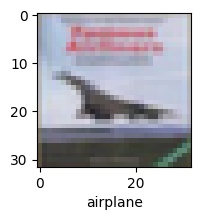

In [28]:
y_test = y_test.reshape(-1,)

show_image(X_test, y_predictions, 3)

### Evaluate Model

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 [==============================] - 6s 19ms/step - loss: 0.8898 - accuracy: 0.6937
Test Loss: 0.8898366093635559, Test Accuracy: 0.6937000155448914


In [37]:
y_predictions = model.predict(X_test)  # Get predictions (probabilities)
y_predictions = np.argmax(y_predictions, axis=1)  # Convert probabilities to class labels

313/313 [==============================] - 6s 19ms/step


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))


              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.85      0.80      0.82      1000
           2       0.61      0.51      0.56      1000
           3       0.53      0.47      0.50      1000
           4       0.61      0.65      0.63      1000
           5       0.62      0.57      0.60      1000
           6       0.69      0.82      0.75      1000
           7       0.68      0.78      0.73      1000
           8       0.81      0.80      0.80      1000
           9       0.79      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



<AxesSubplot: >

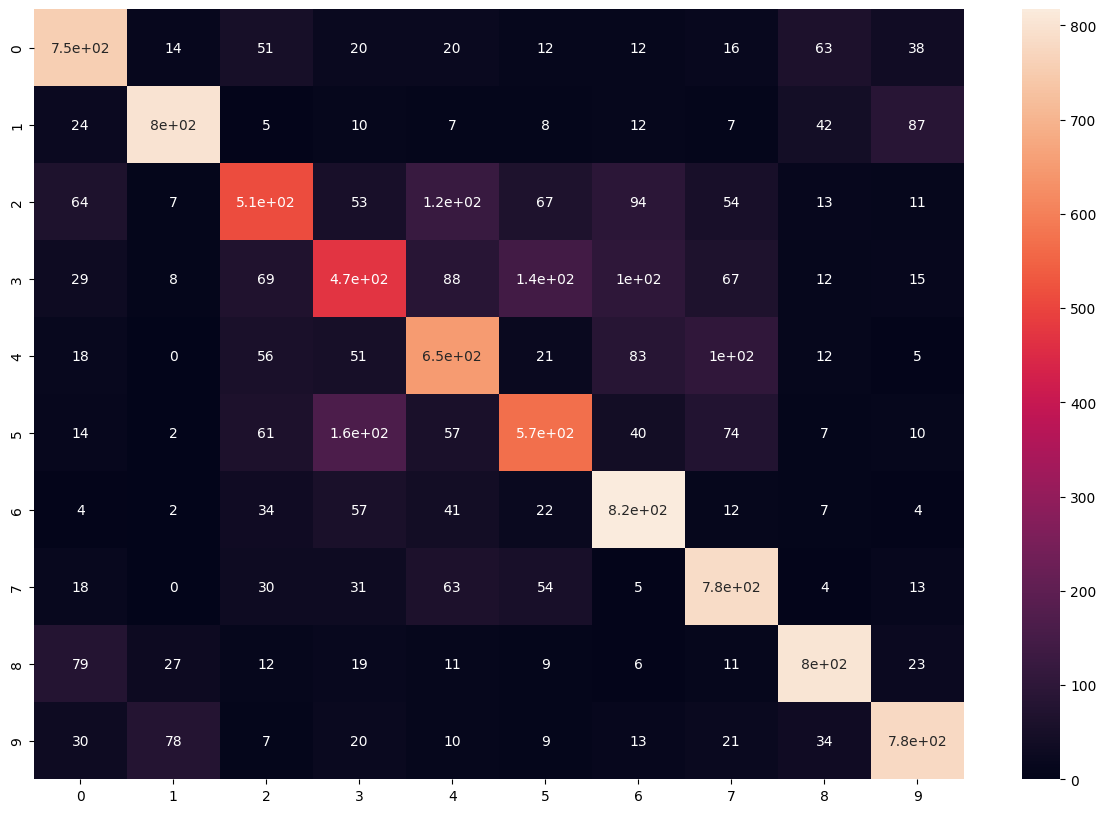

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_predictions)
df_cm = pd.DataFrame(cm, index=[i for i in range(10)], columns=[i for i in range(10)])
plt.figure(figsize=(15,10))
sns.heatmap(df_cm, annot=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c291c622-1aca-459c-9283-997fd4a58680' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>